### Erick Zherdmant

## Importamos librerías

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from scipy import signal, stats
from scipy.stats import kurtosis
import numpy as np #La usaremos principalmente porque nos permite crear y modificar matrices, 
#y hacer operaciones sobre ellas con facilidad
from numpy.fft import fft, ifft
import seaborn as sn #es una biblioteca de visualización de datos de Python basada en matplotlib.
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Leemos Datos

In [7]:
data = pd.read_csv("ERPdata.csv")
display(data)

,subject,condition,Fz,FCz,Cz,FC3,FC4,C3,C4,CP3,CP4,time_ms
0,1,1,5.533701,5.726507,5.469535,5.386723,4.588875,6.560092,4.542811,5.397492,5.103695,-1500.0000
1,1,1,5.651489,5.837326,5.773131,5.627975,4.822217,6.739976,4.811770,5.541357,5.379273,-1499.0234
2,1,1,5.717580,5.932924,5.948466,5.826460,4.979647,7.026199,5.053779,5.634972,5.600504,-1498.0469
3,1,1,5.703267,5.968103,5.851512,5.812192,4.992899,6.940671,5.106650,5.543577,5.589775,-1497.0703
4,1,1,5.571578,5.917541,5.812808,5.744715,4.963338,6.726491,5.158073,5.454069,5.614092,-1496.0938
...,...,...,...,...,...,...,...,...,...,...,...,...
746491,81,3,-0.401267,0.041014,-0.352556,0.712530,-0.427019,0.479170,1.041864,0.645761,-0.085649,1495.1172
746492,81,3,-0.440294,0.093863,-0.422151,0.792209,-0.469230,0.486767,0.955658,0.601938,-0.264824,1496.0938
746493,81,3,-0.466162,0.083799,-0.485091,0.799034,-0.466002,0.516740,0.972635,0.612470,-0.463196,1497.0703
746494,81,3,-0.472620,0.003017,-0.465663,0.675452,-0.408777,0.558901,0.943028,0.635287,-0.656748,1498.0469


## Individuo malito

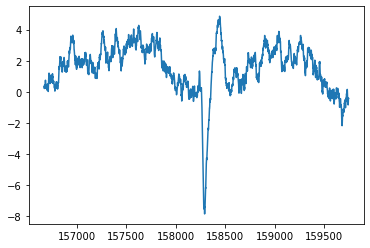

In [3]:
# subject 18: control; sensor: C4; condition: 1
fs = 1024 # Hz
erp_sub18_con1 = data.loc[(data['subject'] == 18) & (data['condition'] == 1), 'C4']
plt.plot(erp_sub18_con1)
plt.show()

## Individuo sanote

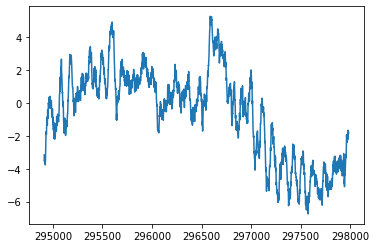

In [4]:
# subject 33: control; sensor: C4; condition: 1
fs = 1024 # Hz
erp_sub33_con1 = data.loc[(data['subject'] == 33) & (data['condition'] == 1), 'C4']
plt.plot(erp_sub33_con1)
plt.show()

## Obtén algún parámetro estadístico en el dominio natural que permita distinguir una señal de la otra

### Individuo Malito

count    3072.000000
mean        1.532221
std         1.597809
min        -7.870068
25%         0.584154
50%         1.764738
75%         2.669612
max         4.861314
Name: C4, dtype: float64
mode	 -7.87006842105263
Simetría : -1.734921505085244
Curtosis para distribución normal : 6.797895188130028
Curtosis para distribución normal : 9.797895188130028
Curtosis para distribución normal : 6.797895188130028


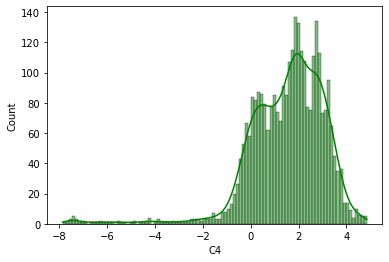

In [226]:
individuo_malito = erp_sub18_con1
print(individuo_malito.describe())
print("mode\t", str(stats.mode(individuo_malito)[0][0]))
print( 'Simetría :', individuo_malito.skew()) 
print( 'Curtosis para distribución normal :', kurtosis(individuo_malito)) 
print( 'Curtosis para distribución normal :', kurtosis(individuo_malito, fisher = False)) 
print( 'Curtosis para distribución normal :', kurtosis(individuo_malito, fisher = True)) 
sn.histplot(individuo_malito, color='g', bins=100, kde=True);

### Individuo Sano

count    3072.000000
mean       -0.616011
std         2.706258
min        -6.748018
25%        -3.130575
50%         0.044126
75%         1.310658
max         5.283001
Name: C4, dtype: float64
mode	 -6.74801770833333
Simetría : -0.3346904395812969
Curtosis para distribución normal : -0.8101275149478298
Curtosis para distribución normal : 2.1898724850521702
Curtosis para distribución normal : -0.8101275149478298


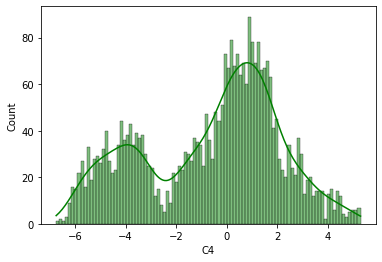

In [194]:
individuo_sanote = erp_sub33_con1
print(individuo_sanote.describe())
print("mode\t", stats.mode(individuo_sanote)[0][0])
print( 'Simetría :', individuo_sanote.skew()) 
print( 'Curtosis para distribución normal :', kurtosis(individuo_sanote)) 
print( 'Curtosis para distribución normal :', kurtosis(individuo_sanote, fisher = False)) 
print( 'Curtosis para distribución normal :', kurtosis(individuo_sanote, fisher = True)) 
sn.histplot(individuo_sanote, color='g', bins=100, kde=True);

### Comparación

De acuerdo a los datos se pueden evidenciar que en el paciente malito la desviación estándar es menor que en el paciente sano. Por otro lado los histogramas evidencian que ambos pacientes tienen un simetría negativa; sin embargo el paciente malito es el que tiene un histograma más hacia la izquierda. En definitiva se evidencia una diferencia entre las dos señales.

## Obtén algún parámetro estadístico en el dominio frecuencial que permita distinguir una señal de la otra

In [196]:
individuo_malito_fft = numpy.fft.fft(individuo_malito)
individuo_sanote_fft = numpy.fft.fft(individuo_sanote)
N = len(individuo_malito_fft)
n = np.arange(N)
T = N/fs
freq = n/T 

### Individuo Malito

C:\Users\zherdmant\anaconda3\lib\site-packages\scipy\signal\spectral.py:1816: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


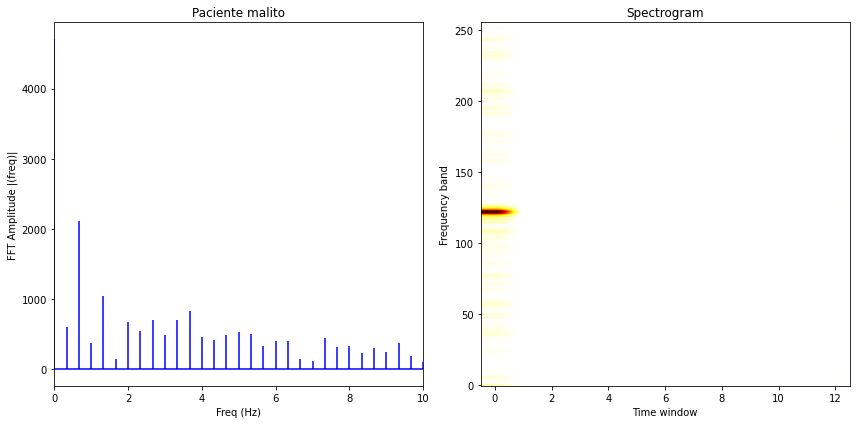

,PAciente Malito
count,3072.000000
mean,20.699660
std,120.949025
min,0.017045
25%,1.767029
50%,3.717031
75%,9.572464
max,4706.982306


In [224]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.stem(freq, np.abs(individuo_malito_fft), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |(freq)|')
plt.xlim(0, 10)
plt.title('Paciente malito')

plt.subplot(122)
freqs, times, spectrogram = signal.spectrogram(individuo_malito_fft)
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

plt.show()

df = pd.DataFrame(np.abs(individuo_malito_fft), columns = ['PAciente Malito'])
display(df.describe())

### Individuo Sanote

C:\Users\zherdmant\anaconda3\lib\site-packages\scipy\signal\spectral.py:1816: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


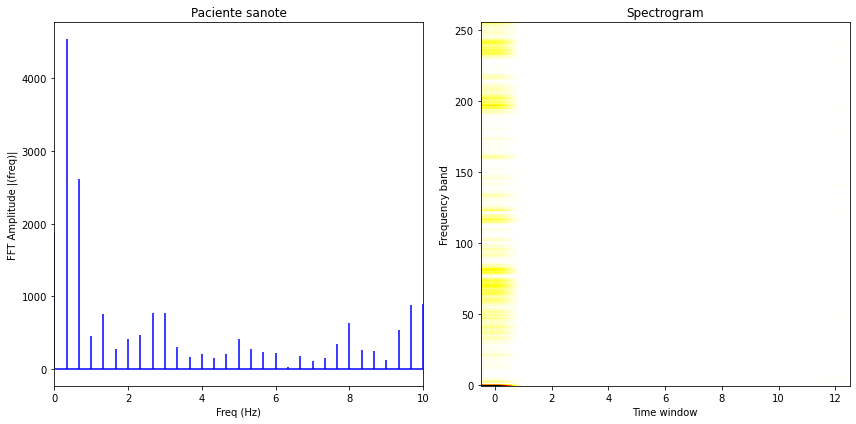

,Paciente Sanote
count,3072.000000
mean,25.914533
std,151.634886
min,0.111845
25%,2.622503
50%,6.533712
75%,14.877073
max,4538.677067


In [225]:
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.stem(freq, np.abs(individuo_sanote_fft), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |(freq)|')
plt.xlim(0, 10)
plt.title('Paciente sanote')

plt.subplot(122)
freqs, times, spectrogram = signal.spectrogram(individuo_sanote_fft)
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()

plt.show()

df = pd.DataFrame(np.abs(individuo_sanote_fft), columns = ['Paciente Sanote'])
display(df.describe())

### Comparación

Al igual que en el dominio natural se evidencia diferencias entre las dos señales en la media siendo mayor en el paciente sano así mismo la desviación estandar de cada uno de ellas; por lo que en se puede evidenciar diferencias entre ambas señales.